In [ ]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score, accuracy_score, confusion_matrix

2024-08-30 15:47:17.695954: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-08-30 15:47:18.631848: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


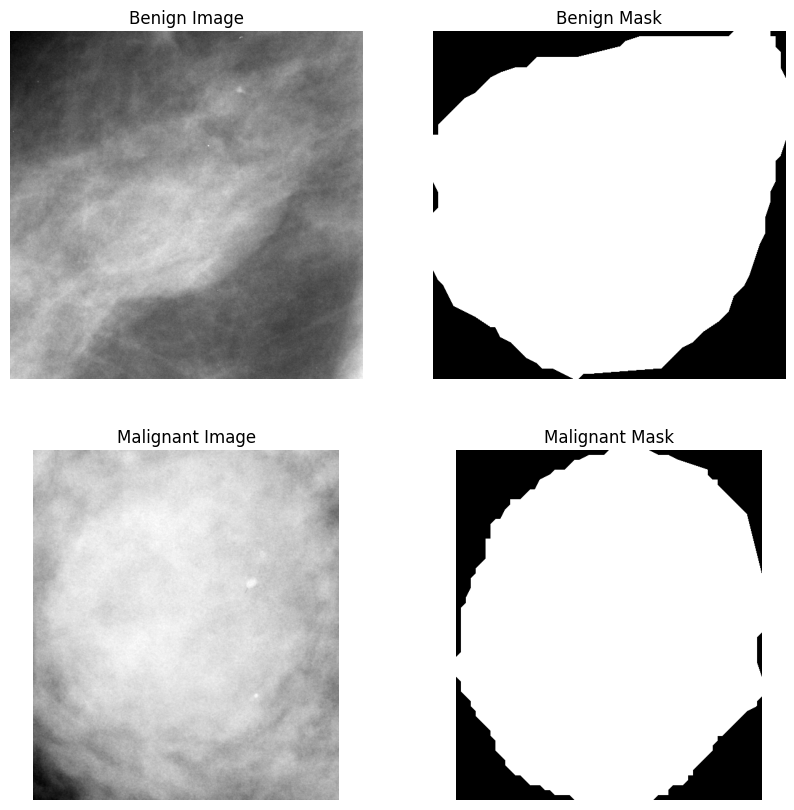

Training set size: 1176
Validation set size: 392
Test set size: 393
Class Weights: {0: 1.8997226016511666, 1: 0.6786068180260078}


2024-08-30 15:51:20.919695: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-30 15:51:21.463317: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-30 15:51:21.463589: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/50


2024-08-30 15:51:23.436581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-08-30 15:51:29.538866: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8903
2024-08-30 15:51:34.532738: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f28f5ad3d50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-30 15:51:34.532774: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2024-08-30 15:51:34.538588: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-30 15:51:34.713946

73/73 [==============================] - ETA: 0s - loss: 8.4389 - accuracy: 0.2821

2024-08-30 15:52:13.217708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


73/73 [==============================] - 62s 556ms/step - loss: 8.4389 - accuracy: 0.2821 - val_loss: 8.5469 - val_accuracy: 0.2764
Epoch 2/50
Epoch 2/50
73/73 [==============================] - 35s 411ms/step - loss: 8.5510 - accuracy: 0.2760 - val_loss: 8.5469 - val_accuracy: 0.2764
Epoch 3/50
73/73 [==============================] - 30s 409ms/step - loss: 8.5495 - accuracy: 0.2761 - val_loss: 8.5469 - val_accuracy: 0.2764
Epoch 4/50
73/73 [==============================] - 29s 406ms/step - loss: 8.5563 - accuracy: 0.2755 - val_loss: 8.5469 - val_accuracy: 0.2764
Epoch 5/50
73/73 [==============================] - 29s 406ms/step - loss: 8.5525 - accuracy: 0.2759 - val_loss: 8.5469 - val_accuracy: 0.2764
Epoch 6/50
73/73 [==============================] - 30s 410ms/step - loss: 8.5526 - accuracy: 0.2758 - val_loss: 8.5469 - val_accuracy: 0.2764
Epoch 7/50
73/73 [==============================] - 30s 409ms/step - loss: 8.5528 - accuracy: 0.2758 - val_loss: 8.5469 - val_accuracy: 0.2764

In [1]:
# Define the data directory
data_dir = '/home/ubuntu/BCS/Breast_Cancer_Segmentation/Mass_Data' # change the path of the directory
categories = ['Benign', 'Malignant']

# Function to load and visualize data
def load_and_visualize_data(data_dir, categories):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    
    for i, category in enumerate(categories):
        category_dir = os.path.join(data_dir, category)
        images = [f for f in os.listdir(category_dir) if f.endswith('.png') and 'MASK' not in f]
        
        img_path = os.path.join(category_dir, images[0])
        mask_path = os.path.join(category_dir, images[0].replace('.png', '_MASK.png'))
        
        image = img_to_array(load_img(img_path, color_mode='grayscale'))
        mask = img_to_array(load_img(mask_path, color_mode='grayscale'))
        
        axes[i, 0].imshow(image.squeeze(), cmap='gray')
        axes[i, 0].set_title(f'{category.capitalize()} Image')
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(mask.squeeze(), cmap='gray')
        axes[i, 1].set_title(f'{category.capitalize()} Mask')
        axes[i, 1].axis('off')
    
    plt.show()

# Visualize the data
load_and_visualize_data(data_dir, categories)

# Function to get image and mask pairs
def get_image_mask_pairs(data_dir, categories):
    image_paths = []
    mask_paths = []
    
    for category in categories:
        category_dir = os.path.join(data_dir, category)
        images = [f for f in os.listdir(category_dir) if f.endswith('.png') and 'MASK' not in f]
        
        for image in images:
            img_path = os.path.join(category_dir, image)
            mask_path = os.path.join(category_dir, image.replace('.png', '_MASK.png'))
            image_paths.append(img_path)
            mask_paths.append(mask_path)
    
    return np.array(image_paths), np.array(mask_paths)

# Get image and mask pairs
image_paths, mask_paths = get_image_mask_pairs(data_dir, categories)

# Split the data
train_img_paths, test_img_paths, train_mask_paths, test_mask_paths = train_test_split(image_paths, mask_paths, test_size=0.2, random_state=42)
train_img_paths, val_img_paths, train_mask_paths, val_mask_paths = train_test_split(train_img_paths, train_mask_paths, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Summary of the splits
print(f"Training set size: {len(train_img_paths)}")
print(f"Validation set size: {len(val_img_paths)}")
print(f"Test set size: {len(test_img_paths)}")

# Data augmentation
data_gen_args = dict(rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.1,
                     zoom_range=0.1,
                     horizontal_flip=True,
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Example of applying augmentation to an image and its mask
def augment_data(img_path, mask_path, image_datagen, mask_datagen):
    img = img_to_array(load_img(img_path, color_mode='grayscale'))
    mask = img_to_array(load_img(mask_path, color_mode='grayscale'))
    
    img = img.reshape((1,) + img.shape)
    mask = mask.reshape((1,) + mask.shape)
    
    img_gen = image_datagen.flow(img, batch_size=1)
    mask_gen = mask_datagen.flow(mask, batch_size=1)
    
    img_aug, mask_aug = next(img_gen), next(mask_gen)
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(img_aug[0].squeeze(), cmap='gray')
    axes[0].set_title('Augmented Image')
    axes[0].axis('off')
    
    axes[1].imshow(mask_aug[0].squeeze(), cmap='gray')
    axes[1].set_title('Augmented Mask')
    axes[1].axis('off')
    
    plt.show()

# Example usage
augment_data(train_img_paths[0], train_mask_paths[0], image_datagen, mask_datagen)

# U-Net Model Definition
def unet_model(input_size=(256, 256, 1)):
    inputs = Input(input_size)
    
    # Contracting Path
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
    
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)
    
    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)
    
    # Expanding Path
    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)
    
    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)
    
    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)
    
    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model

# Dice and BCE Loss Functions
def dice_loss(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def bce_dice_loss(y_true, y_pred):
    bce_loss = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)
    dice = dice_loss(y_true, y_pred)
    return bce_loss + dice

# Initialize the model
model = unet_model()
model.compile(optimizer='adam', loss=bce_dice_loss, metrics=['accuracy'])
model.summary()

# Data Generator
def create_generators(image_paths, mask_paths, batch_size, image_datagen, mask_datagen):
    while True:
        for i in range(0, len(image_paths), batch_size):
            batch_img_paths = image_paths[i:i + batch_size]
            batch_mask_paths = mask_paths[i:i + batch_size]
            
            img_batch = np.array([img_to_array(load_img(img_path, color_mode='grayscale', target_size=(256, 256))) for img_path in batch_img_paths])
            mask_batch = np.array([img_to_array(load_img(mask_path, color_mode='grayscale', target_size=(256, 256))) for mask_path in batch_mask_paths])
            
            img_batch = img_batch.astype('float32') / 255.0
            mask_batch = mask_batch.astype('float32') / 255.0
            
            img_gen = image_datagen.flow(img_batch, batch_size=batch_size, shuffle=True, seed=42)
            mask_gen = mask_datagen.flow(mask_batch, batch_size=batch_size, shuffle=True, seed=42)
            
            yield next(img_gen), next(mask_gen)

# Generators for training and validation
train_generator = create_generators(train_img_paths, train_mask_paths, 16, image_datagen, mask_datagen)
val_generator = create_generators(val_img_paths, val_mask_paths, 16, image_datagen, mask_datagen)

# Callbacks
checkpoint = ModelCheckpoint('unet_model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # stop training when the model stops learning

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_img_paths) // 16,
    validation_data=val_generator,
    validation_steps=len(val_img_paths) // 16,
    epochs=50,
    callbacks=[checkpoint, early_stopping]
)

# Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

# Visualize the performance
plot_training_history(history)

# Evaluation Metrics
def calculate_metrics(y_true, y_pred, threshold=0.5):
    y_pred_binary = (y_pred > threshold).astype(int)
    
    dice = 2 * np.sum(y_true * y_pred_binary) / (np.sum(y_true) + np.sum(y_pred_binary))
    iou = jaccard_score(y_true.flatten(), y_pred_binary.flatten())
    precision = precision_score(y_true.flatten(), y_pred_binary.flatten())
    recall = recall_score(y_true.flatten(), y_pred_binary.flatten())
    f1 = f1_score(y_true.flatten(), y_pred_binary.flatten())
    
    return dice, iou, precision, recall, f1

# Evaluate the model on the test set
def evaluate_model_on_test_set(model, test_img_paths, test_mask_paths):
    y_true = []
    y_pred = []
    
    for img_path, mask_path in zip(test_img_paths, test_mask_paths):
        img = img_to_array(load_img(img_path, color_mode='grayscale', target_size=(256, 256)))
        mask = img_to_array(load_img(mask_path, color_mode='grayscale', target_size=(256, 256)))
        
        img = img.reshape((1,) + img.shape)
        pred_mask = model.predict(img)
        pred_mask = (pred_mask > 0.5).astype(int)
        
        y_true.append(mask.flatten())
        y_pred.append(pred_mask.flatten())
    
    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)
    
    dice, iou, precision, recall, f1 = calculate_metrics(y_true, y_pred)
    
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    print(f'Accuracy on the test set: {accuracy * 100:.2f}%')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Dice Coefficient: {dice:.4f}')
    print(f'IoU: {iou:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

# Run evaluation
evaluate_model_on_test_set(model, test_img_paths, test_mask_paths)

# Visualize Predictions
def visualize_predictions(model, test_img_paths, test_mask_paths, num_samples=5):
    """
    Visualizes the test images, ground truth masks, and predicted masks.
    
    Parameters:
    - model: Trained U-Net model.
    - test_img_paths: List of paths to test images.
    - test_mask_paths: List of paths to ground truth masks for the test images.
    - num_samples: Number of samples to visualize.
    """
    for i in range(num_samples):
        # Load and preprocess the test image and its corresponding mask
        img_path = test_img_paths[i]
        mask_path = test_mask_paths[i]
        
        img = img_to_array(load_img(img_path, color_mode='grayscale', target_size=(256, 256))) / 255.0
        mask = img_to_array(load_img(mask_path, color_mode='grayscale', target_size=(256, 256))) / 255.0
        
        # Predict the mask
        pred_mask = model.predict(img.reshape(1, 256, 256, 1))
        pred_mask = (pred_mask > 0.5).astype(int).reshape(256, 256)
        
        # Plot the image, ground truth mask, and predicted mask
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 3, 1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title('Test Image')
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.imshow(mask.squeeze(), cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask, cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')
        
        plt.show()

# Example usage:
visualize_predictions(model, test_img_paths, test_mask_paths, num_samples=5)


In [3]:
# Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()